In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
cleaned_data_path = 'Cleaned_Dataset.xlsx'
cleaned_data_df = pd.read_excel(cleaned_data_path)

print(cleaned_data_df.head())

       id  parent_id  Salvador Amount  Other Grant Amount  \
0  126508     102310              0.0                 0.0   
1  126486      53338              0.0                 0.0   
2  126485     126484              0.0                 0.0   
3  126483     119109              0.0                 0.0   
4  126376      34176              0.0                 0.0   

   Bob Woodruff Foundation Amount  San Manuel BOMI Amount Assist Status  \
0                             0.0                     0.0     Withdrawn   
1                             0.0                     0.0        Active   
2                             0.0                     0.0        Active   
3                             0.0                     0.0        Active   
4                             0.0                     0.0        Active   

  Date Opened                 Date Closed  Days to Close  ...  Goal 2:  \
0  2023-11-06         2023-11-07 00:00:00              1  ...      NaN   
1  2023-11-06  1677-09-20 00:12:43

In [31]:
# Descriptive Statistics Analysis
numerical_overview = cleaned_data_df.describe()
print(numerical_overview)


                  id      parent_id  Salvador Amount  Other Grant Amount  \
count    7964.000000    7964.000000      7964.000000         7964.000000   
mean    52395.103214   49287.485811         1.092338            5.292897   
std     39070.075014   39063.390977        49.552584          115.670064   
min      2822.000000    1705.000000         0.000000            0.000000   
25%     17831.250000   15494.000000         0.000000            0.000000   
50%     41869.500000   37565.000000         0.000000            0.000000   
75%     90605.500000   86886.500000         0.000000            0.000000   
max    126508.000000  126484.000000      2752.040000         3960.680000   

       Bob Woodruff Foundation Amount  San Manuel BOMI Amount  Days to Close  \
count                     7964.000000             7964.000000    7964.000000   
mean                         8.502145                6.278253      13.479282   
std                         94.120938              125.721285      14.42094

In [14]:
# Category-Based Analysis for 'Assist Status' Column
assist_status_distribution = cleaned_data_df['Assist Status'].value_counts()
assist_status_distribution_percentage = cleaned_data_df['Assist Status'].value_counts(normalize=True) * 100

# Displaying the frequency and percentage distribution
assist_status_analysis = pd.DataFrame({
    "Frequency": assist_status_distribution,
    "Percentage": assist_status_distribution_percentage
})

print(assist_status_analysis)

                               Frequency  Percentage
Referred                            1334   16.750377
Withdrawn                           1266   15.896534
FFP Plus Grant                      1090   13.686590
Approved                            1004   12.606730
Financial Freedom Planning           925   11.614766
Unresponsive                         828   10.396786
FFP Plus Referral                    722    9.065796
FFP Plus Warehouse Visit             347    4.357107
Denied                               250    3.139126
Warehouse Visit Only                  94    1.180311
Active                                54    0.678051
FFP Plus Diapers                      22    0.276243
Pending Application Documents         18    0.226017
ineligible                             2    0.025113
Incomplete Budgeting                   1    0.012557
Recycled Rides                         1    0.012557
Fraud                                  1    0.012557
See Record #25337                      1    0.

In [15]:
# Correlation Analysis

# Calculating the correlation matrix for numeric columns
correlation_matrix = cleaned_data_df.corr()

# Displaying the correlation matrix
print(correlation_matrix)

                                           id  parent_id  Salvador Amount  \
id                                   1.000000   0.966561         0.024907   
parent_id                            0.966561   1.000000         0.026473   
Salvador Amount                      0.024907   0.026473         1.000000   
Other Grant Amount                   0.050552   0.051325         0.059287   
Bob Woodruff Foundation Amount       0.087540   0.081886         0.072110   
San Manuel BOMI Amount               0.049253   0.043354        -0.001101   
Days to Close                        0.121457   0.117113         0.038211   
Transitional Assistance?            -0.008947  -0.008371        -0.010663   
Baseline Financial Well-being Score  0.691930   0.662128         0.018063   
1c. Financial Well-being Score       0.859436   0.829578         0.006065   
2c. Financial Well-being Score       0.874887   0.845713         0.030071   
3c. Financial Well-being Score       0.879729   0.848565         0.029693   

In [43]:
# Descriptive Statistics for Overall Effectiveness
overall_effectiveness_stats = cleaned_data_df.describe()

# Segmenting Data for Improvement Areas (example: based on 'Assist Status')
# Replace 'Assist Status' with the actual segmentation criterion column name
segmentation_criterion = 'Assist Status'  # Example
segmented_stats = cleaned_data_df.groupby(segmentation_criterion).describe()


In [44]:
# 'Total Assistance Amount' represents financial grants
# and 'Baseline Financial Well-being Score' as a success metric

# Grouping data by grant presence (here, we consider any assistance amount as grant presence)
cleaned_data_df['GrantReceived'] = cleaned_data_df['Total Assistance Amount'] > 0
grouped_by_grant = cleaned_data_df.groupby('GrantReceived')['Baseline Financial Well-being Score'].mean()

# Displaying the impact
print(grouped_by_grant)


GrantReceived
False    22.466621
True     15.423825
Name: Baseline Financial Well-being Score, dtype: float64


In [45]:
# Correlation Analysis
# 'Number of Services Rendered' represents the frequency of client interactions
correlation = cleaned_data_df[['Number of Services Rendered', 'Baseline Financial Well-being Score']].corr()
print(correlation)

# Optional: Regression Analysis
import statsmodels.api as sm
X = cleaned_data_df['Number of Services Rendered']
y = cleaned_data_df['Baseline Financial Well-being Score']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())


                                     Number of Services Rendered  \
Number of Services Rendered                             1.000000   
Baseline Financial Well-being Score                    -0.138799   

                                     Baseline Financial Well-being Score  
Number of Services Rendered                                    -0.138799  
Baseline Financial Well-being Score                             1.000000  
                                     OLS Regression Results                                    
Dep. Variable:     Baseline Financial Well-being Score   R-squared:                       0.019
Model:                                             OLS   Adj. R-squared:                  0.019
Method:                                  Least Squares   F-statistic:                     156.4
Date:                                 Sun, 26 Nov 2023   Prob (F-statistic):           1.49e-35
Time:                                         18:45:33   Log-Likelihood:                -3

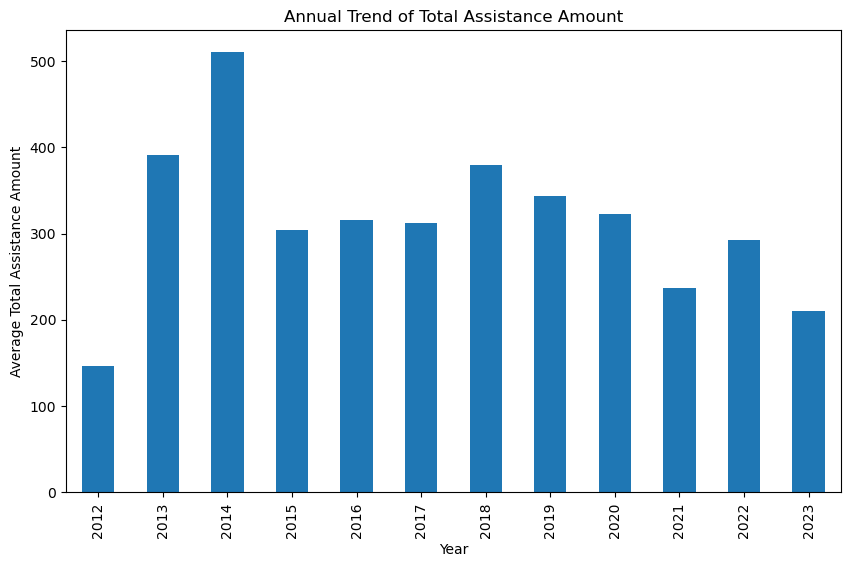

In [46]:
# 'Date Opened' is the date column and 'Total Assistance Amount' is a key metric
cleaned_data_df['Year'] = cleaned_data_df['Date Opened'].dt.year
annual_trends = cleaned_data_df.groupby('Year')['Total Assistance Amount'].mean()

# Plotting
plt.figure(figsize=(10, 6))
annual_trends.plot(kind='bar')
plt.title('Annual Trend of Total Assistance Amount')
plt.xlabel('Year')
plt.ylabel('Average Total Assistance Amount')
plt.show()

In [35]:
# Client Interaction Analysis
interaction_correlation = cleaned_data_df[['Number of Services Rendered', 'Total Assistance Amount']].corr()
print(interaction_correlation)


                             Number of Services Rendered  \
Number of Services Rendered                     1.000000   
Total Assistance Amount                         0.638476   

                             Total Assistance Amount  
Number of Services Rendered                 0.638476  
Total Assistance Amount                     1.000000  


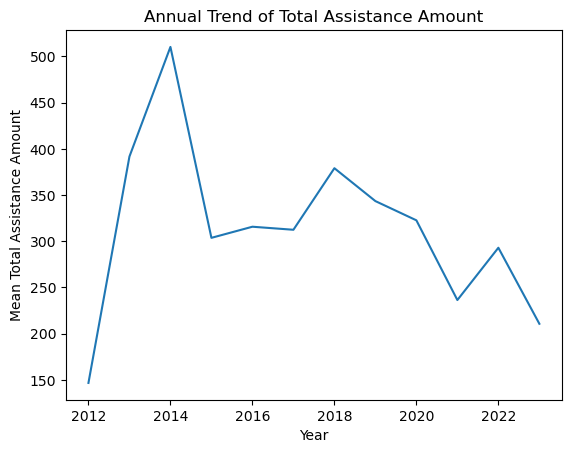

In [36]:
# Converting 'Date Opened' to a datetime object and extracting the year
cleaned_data_df['Year'] = pd.to_datetime(cleaned_data_df['Date Opened']).dt.year

# Grouping by Year and calculating the mean of 'Total Assistance Amount'
annual_trend = cleaned_data_df.groupby('Year')['Total Assistance Amount'].mean()

# Plotting the trend
annual_trend.plot(kind='line', title='Annual Trend of Total Assistance Amount', ylabel='Mean Total Assistance Amount')
plt.show()


In [40]:
# Analysis based on the number of people in a family
family_size_distribution = cleaned_data_df['# People in Family'].value_counts()
print("Family Size Distribution:\n", family_size_distribution)

# Analysis based on the number of children served
children_served_distribution = cleaned_data_df['#Children Served'].value_counts()
print("\nNumber of Children Served Distribution:\n", children_served_distribution)


Family Size Distribution:
 0     7352
1      197
2      107
3      106
4      101
5       60
6       30
7        7
8        3
80       1
Name: # People in Family, dtype: int64

Number of Children Served Distribution:
 0      7221
1       288
2       247
3       130
4        53
5        13
6         6
7         2
160       2
125       1
60        1
Name: #Children Served, dtype: int64


In [41]:
# Analysis based on assistance status
assist_status_distribution = cleaned_data_df['Assist Status'].value_counts()
print("Assist Status Distribution:\n", assist_status_distribution)

# Analysis based on reasons for grant ineligibility
grant_ineligibility_reasons = cleaned_data_df['Reason for Grant Ineligibility'].value_counts()
print("\nReasons for Grant Ineligibility Distribution:\n", grant_ineligibility_reasons)


Assist Status Distribution:
 Referred                         1334
Withdrawn                        1266
FFP Plus Grant                   1090
Approved                         1004
Financial Freedom Planning        925
Unresponsive                      828
FFP Plus Referral                 722
FFP Plus Warehouse Visit          347
Denied                            250
Warehouse Visit Only               94
Active                             54
FFP Plus Diapers                   22
Pending Application Documents      18
ineligible                          2
Incomplete Budgeting                1
Recycled Rides                      1
Fraud                               1
See Record #25337                   1
Duplicate case                      1
Does not Qualify                    1
SM Reapplied                        1
Warehouse Visit                     1
Name: Assist Status, dtype: int64

Reasons for Grant Ineligibility Distribution:
 Out of SOP:  Service not provided                    